In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
%matplotlib inline


In [10]:
dataset = pd.read_csv('risco.csv')

In [12]:
dataset.head()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
print(f"Dataset tem {dataset.shape[0]} linhas {dataset.shape[1]} colunas.")

Dataset tem 150 linhas 6 colunas.


In [18]:
dataset['Risco'].value_counts()

Risco_Alto     50
Risco_Medio    50
Risco_Baixo    50
Name: Risco, dtype: int64

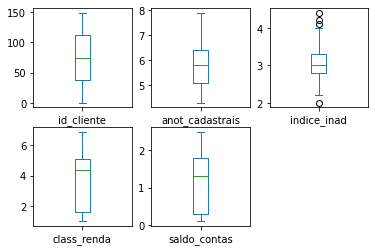

In [19]:
from matplotlib import  pyplot
dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
pyplot.show()

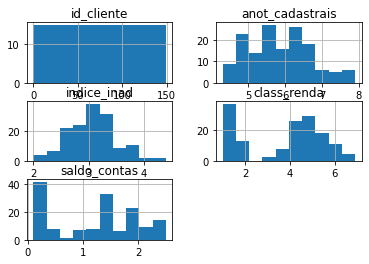

In [20]:
dataset.hist()
plt.show()

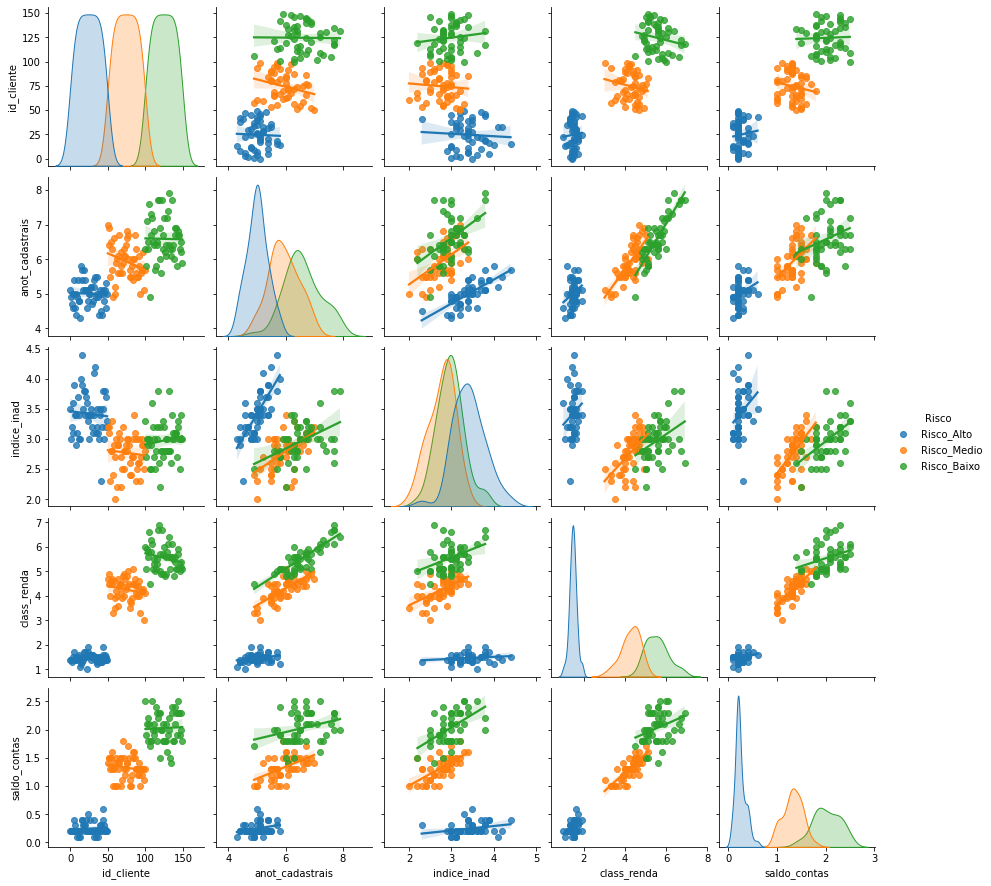

In [21]:
sns.pairplot(dataset, hue='Risco', kind="reg")

In [22]:
X = dataset.iloc[:,:-1].values  
y = dataset.iloc[:,-1].values 

In [23]:
print("\n Variaveis de entrada da avaliação:\n\n",X[:3])
print("\nRisco - Variavel a ser predita:\n\n",y[:3])


 Variaveis de entrada da avaliação:

 [[0.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [2.  4.7 3.2 1.3 0.2]]

Risco - Variavel a ser predita:

 ['Risco_Alto' 'Risco_Alto' 'Risco_Alto']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state = 7)

In [25]:
print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

Dados de Treino :
----------------

X = 
 [[126.    6.2   2.8   4.8   1.8]
 [ 79.    5.7   2.6   3.5   1. ]]
y = 
 ['Risco_Baixo' 'Risco_Medio']


Dados de Teste :
----------------

X = 
 [[149.    5.9   3.    5.1   1.8]
 [ 84.    5.4   3.    4.5   1.5]]
y = 
 ['Risco_Baixo' 'Risco_Medio']


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[ 1.20732325  0.43325894 -0.59653573  0.62601116  0.82081788]
 [ 0.14948526 -0.15754871 -1.05688485 -0.09737951 -0.21464226]
 [-1.13342464 -1.45732553  1.24486074 -1.48851543 -1.2501024 ]
 [ 1.49991673  1.26038965  0.09398794  0.95988378  1.20911544]
 [ 0.03694931  0.669582   -0.36636117  0.34778398  0.17365529]]
-------------------------

X_test :
 [[ 1.72498864  0.07877435 -0.13618661  0.79294747  0.82081788]
 [ 0.26202122 -0.51203329 -0.13618661  0.45907485  0.43252033]
 [-0.72829519 -0.98467941  1.01468618 -1.32157912 -1.12066988]
 [-0.14310822 -0.27571024 -0.13618661  0.45907485  0.43252033]
 [ 0.75717942 -1.10284094 -1.28705941  0.45907485  0.69138537]]


In [27]:
from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30)

In [28]:
Maquina_Preditiva = Maquina_Preditiva.fit(X_train,y_train)

In [31]:
y_pred = Maquina_Preditiva.predict(X_test)

print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)


---------------------------

Valores Reais com dados de teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Valores Preditos com a Máquina Preditiva com dados de Teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Medio'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [32]:
from sklearn import metrics
print("Acurácia da Maquina =", metrics.accuracy_score(y_test, y_pred)*100)

Acurácia da Maquina = 93.33333333333333


In [33]:
print("\nReal vs Predito \n------------------------------------\n")
error_df = pd.DataFrame({"Real" : y_test, "Predito":y_pred})

error_df.head(5)


Real vs Predito 
------------------------------------



,Real,Predito
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Medio


In [34]:
from sklearn.metrics import  confusion_matrix, classification_report
from sklearn import metrics

print("Acurácia da Máquina =",metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

Acurácia da Máquina = 93.33333333333333
[[ 7  0  0]
 [ 0  9  2]
 [ 0  0 12]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       1.00      0.82      0.90        11
 Risco_Medio       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

